<a href="https://colab.research.google.com/github/svkamat111922-sketch/Online-Store-Inventory/blob/main/Histogramequalizationusingownfunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import files
uploaded = files.upload()


Saving iimg.jpg to iimg.jpg


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get image name
img_name = list(uploaded.keys())[0]

# Read image
img = cv2.imread(img_name)

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


(np.float64(-0.5), np.float64(799.5), np.float64(554.5), np.float64(-0.5))

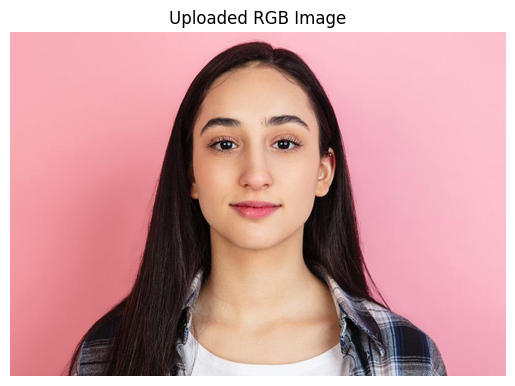

In [14]:
plt.imshow(img)
plt.title("Uploaded RGB Image")
plt.axis('off')


In [15]:
def rgb_to_hsi(image):
    image = image.astype(np.float32) / 255.0
    R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]

    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G)**2 + (R - B)*(G - B)) + 1e-6
    theta = np.arccos(num / den)

    H = np.where(B <= G, theta, 2*np.pi - theta)
    H = H / (2*np.pi)

    min_rgb = np.minimum(np.minimum(R, G), B)
    S = 1 - (3 * min_rgb / (R + G + B + 1e-6))

    I = (R + G + B) / 3

    return H, S, I


In [16]:
H, S, I = rgb_to_hsi(img)


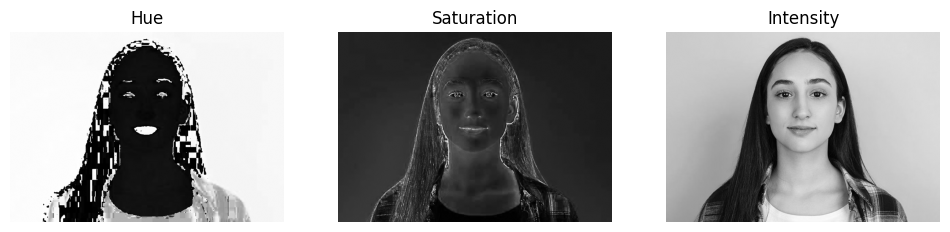

In [17]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(H, cmap='gray')
plt.title("Hue")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(S, cmap='gray')
plt.title("Saturation")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(I, cmap='gray')
plt.title("Intensity")
plt.axis('off')

plt.show()


(np.float64(-0.5), np.float64(799.5), np.float64(554.5), np.float64(-0.5))

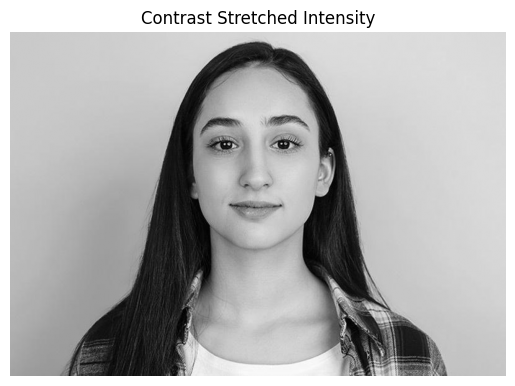

In [18]:
def contrast_stretch(I):
    Imin, Imax = np.min(I), np.max(I)
    return (I - Imin) / (Imax - Imin)

I_cs = contrast_stretch(I)

plt.imshow(I_cs, cmap='gray')
plt.title("Contrast Stretched Intensity")
plt.axis('off')


In [21]:
hist = cv2.calcHist(
    images=[I_uint8],   # input image
    channels=[0],    # single channel (kernel)
    mask=None,
    histSize=[256],  # number of gray levels
    ranges=[0, 256]
)

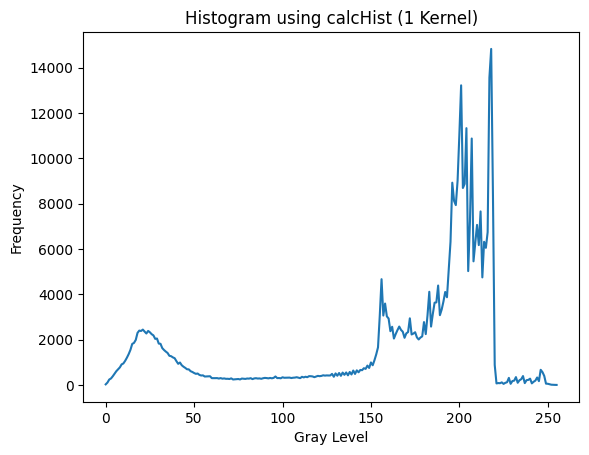

In [22]:
plt.figure()
plt.plot(hist)
plt.title("Histogram using calcHist (1 Kernel)")
plt.xlabel("Gray Level")
plt.ylabel("Frequency")
plt.show()


(np.float64(-0.5), np.float64(799.5), np.float64(554.5), np.float64(-0.5))

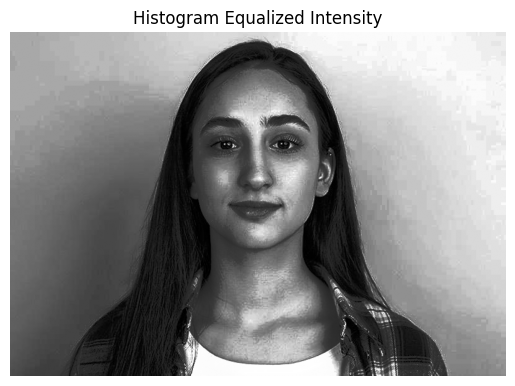

In [23]:
I_uint8 = np.uint8(I * 255)
I_he = cv2.equalizeHist(I_uint8) / 255.0

plt.imshow(I_he, cmap='gray')
plt.title("Histogram Equalized Intensity")
plt.axis('off')


In [25]:
I_he_uint8 = np.uint8(I_he * 255)


In [26]:
hist_eq = cv2.calcHist(
    images=[I_he_uint8],
    channels=[0],      # 1 kernel / single channel
    mask=None,
    histSize=[256],
    ranges=[0, 256]
)


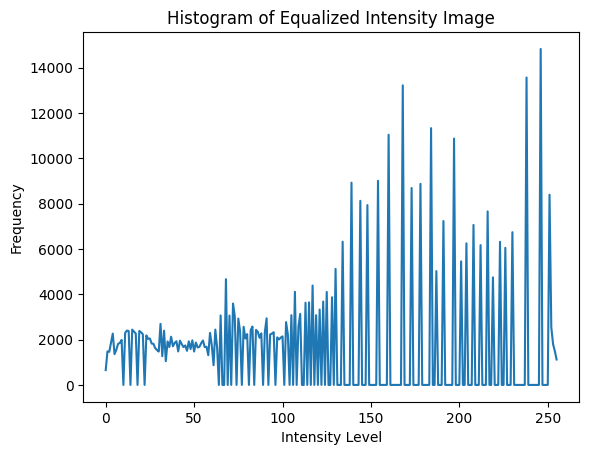

In [27]:
plt.figure()
plt.plot(hist_eq)
plt.title("Histogram of Equalized Intensity Image")
plt.xlabel("Intensity Level")
plt.ylabel("Frequency")
plt.show()


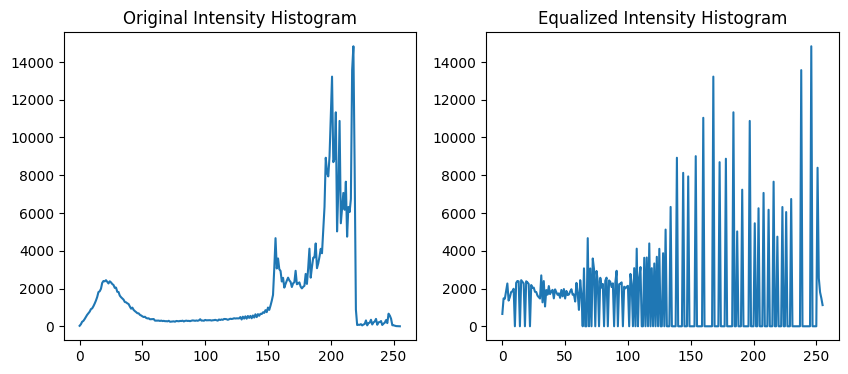

In [28]:
hist_orig = cv2.calcHist([I_uint8], [0], None, [256], [0,256])

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(hist_orig)
plt.title("Original Intensity Histogram")

plt.subplot(1,2,2)
plt.plot(hist_eq)
plt.title("Equalized Intensity Histogram")

plt.show()


(np.float64(-0.5), np.float64(799.5), np.float64(554.5), np.float64(-0.5))

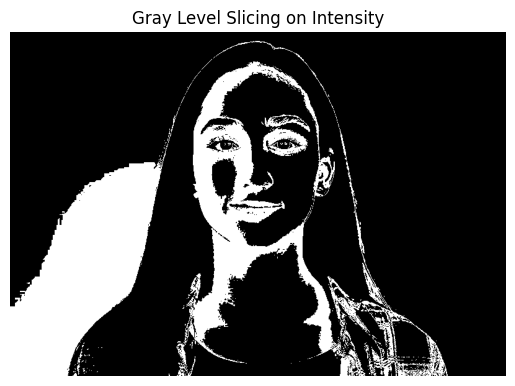

In [29]:
def gray_level_slicing(I, r1=0.4, r2=0.7):
    sliced = np.zeros_like(I)
    sliced[(I >= r1) & (I <= r2)] = 1
    return sliced

I_gls = gray_level_slicing(I)

plt.imshow(I_gls, cmap='gray')
plt.title("Gray Level Slicing on Intensity")
plt.axis('off')


(np.float64(-0.5), np.float64(799.5), np.float64(554.5), np.float64(-0.5))

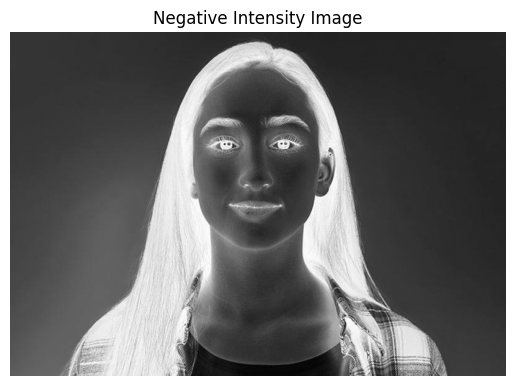

In [30]:
I_neg = 1 - I

plt.imshow(I_neg, cmap='gray')
plt.title("Negative Intensity Image")
plt.axis('off')


In [31]:
def hsi_to_rgb(H, S, I):
    H = H * 2 * np.pi
    R = np.zeros_like(H)
    G = np.zeros_like(H)
    B = np.zeros_like(H)

    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            h = H[i, j]
            s = S[i, j]
            ii = I[i, j]

            if 0 <= h < 2*np.pi/3:
                B[i,j] = ii * (1 - s)
                R[i,j] = ii * (1 + (s*np.cos(h)) / np.cos(np.pi/3 - h))
                G[i,j] = 3*ii - (R[i,j] + B[i,j])

            elif 2*np.pi/3 <= h < 4*np.pi/3:
                h -= 2*np.pi/3
                R[i,j] = ii * (1 - s)
                G[i,j] = ii * (1 + (s*np.cos(h)) / np.cos(np.pi/3 - h))
                B[i,j] = 3*ii - (R[i,j] + G[i,j])

            else:
                h -= 4*np.pi/3
                G[i,j] = ii * (1 - s)
                B[i,j] = ii * (1 + (s*np.cos(h)) / np.cos(np.pi/3 - h))
                R[i,j] = 3*ii - (G[i,j] + B[i,j])

    rgb = np.stack((R, G, B), axis=2)
    return np.clip(rgb, 0, 1)


(np.float64(-0.5), np.float64(799.5), np.float64(554.5), np.float64(-0.5))

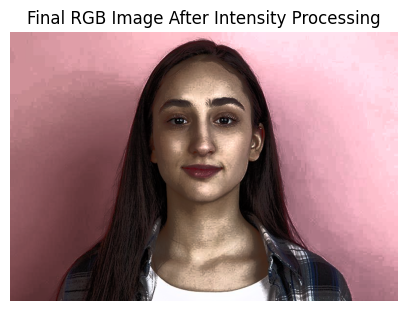

In [32]:
rgb_final = hsi_to_rgb(H, S, I_he)

plt.figure(figsize=(5,5))
plt.imshow(rgb_final)
plt.title("Final RGB Image After Intensity Processing")
plt.axis('off')


In [35]:
#Extra task to write own functions of histogram equalization
I_uint8 = np.uint8(I * 255)



In [36]:
def my_histogram(image):
    hist = np.zeros(256, dtype=int)
    rows, cols = image.shape

    for i in range(rows):
        for j in range(cols):
            intensity = image[i, j]
            hist[intensity] += 1

    return hist


In [37]:
hist_I = my_histogram(I_uint8)


In [38]:
def my_pdf(hist, total_pixels):
    return hist / total_pixels


In [39]:
total_pixels = I_uint8.size
pdf_I = my_pdf(hist_I, total_pixels)


In [40]:
def my_cdf(pdf):
    cdf = np.zeros_like(pdf, dtype=float)
    cdf[0] = pdf[0]

    for i in range(1, len(pdf)):
        cdf[i] = cdf[i-1] + pdf[i]

    return cdf


In [41]:
cdf_I = my_cdf(pdf_I)


In [42]:
def my_hist_equalization(image, cdf):
    eq_img = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            eq_img[i, j] = np.uint8(255 * cdf[image[i, j]])

    return eq_img


In [43]:
I_eq_my = my_hist_equalization(I_uint8, cdf_I)


(np.float64(-0.5), np.float64(799.5), np.float64(554.5), np.float64(-0.5))

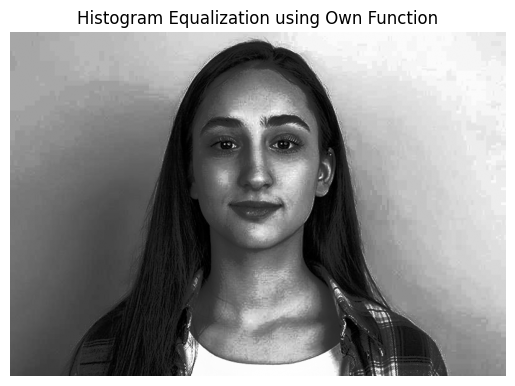

In [44]:
plt.imshow(I_eq_my, cmap='gray')
plt.title("Histogram Equalization using Own Function")
plt.axis('off')


In [45]:
hist_eq_my = my_histogram(I_eq_my)


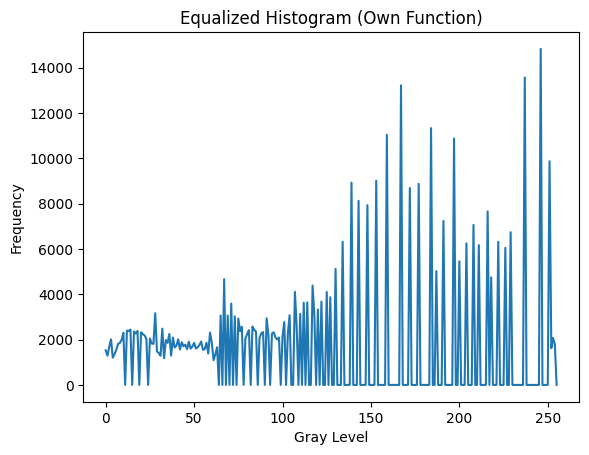

In [46]:
plt.figure()
plt.plot(hist_eq_my)
plt.title("Equalized Histogram (Own Function)")
plt.xlabel("Gray Level")
plt.ylabel("Frequency")
plt.show()
